# **Customer Segmentation: Unlocking Insights for Better Business Strategies**

**Introduction:**

In today's competitive market, understanding customer behavior is crucial for driving business growth and optimizing marketing efforts. This project delves into customer segmentation using Exploratory Data Analysis (EDA) techniques on a dataset of online retail transactions. By identifying distinct customer groups based on their purchasing patterns, we aim to provide valuable insights that can be leveraged for targeted marketing campaigns, personalized recommendations, and improved customer retention.

**Project Details:**

The project utilizes a dataset of online retail transactions, which includes information on customer demographics, purchase history, and product details. The following steps were undertaken to achieve our objectives:

1. **Data Exploration:** We began by exploring the data, examining the various features and identifying any missing values or inconsistencies to ensure data integrity and accuracy.

2. **Analysis & Interpretation:** We analyzed the characteristics of each segment, identifying their unique purchasing patterns, product preferences, and overall behavior. This analysis provides actionable insights into the motivations and needs of different customers.

3. **Visualization:** Visualizations were employed to effectively communicate the findings of the analysis. These visual representations helped in understanding the key characteristics of each customer segment and their relationship with overall business performance.

**The following are the questions for which I was curious to know the answers:**

**1. InvoiceNo (Transaction Analysis):**
- How many transactions (invoices) are generated over time? Are there seasonal trends in transaction volume?

**2. StockCode & Description (Product Analysis):**
- What are the most and least popular products purchased?

(a). Top 10 most frequently purchased products based on StockCode.

(b). Visualizing frequently bought products based on the description.

(c). Showing how a small percentage of products contribute to the majority of sales.

**3. Quantity (Purchase Behavior)**
- What is the distribution of quantities purchased? Are there customers who make unusually large purchases?

**4. InvoiceDate (Time-Based Trends)**
- Showing purchase activity by day of the week and hour to see peak shopping times

**5. UnitPrice (Pricing Analysis)**
- How does the price distribution look? Are there outliers in the pricing structure?

**6. CustomerID (Customer Behavior)**
- How many unique customers are there? Are there repeat customers, or do most customers make a single purchase?

**7. Country (Geographical Analysis)**
- Where are most of the customers located?

**8. Checking which region has a higher customer base.**

**9. Checking how much are sales happened for each product category and how many quantities each category is being sold.**

**Conclusion:**

The insights generated from this analysis can be instrumental in enhancing customer experience, improving marketing ROI, and ultimately driving overall business success.

## **1) Data Collection**

- Dataset is downloaded from https://archive.ics.uci.edu/dataset/352/online+retail
- The data consists of 541909 rows and 8 columns
- Randomly sampled 20% of the data and save it in the CSV file

**sampled_df = df.sample(frac=0.2, random_state=42)**

**sampled_df.to_csv('online_retail.csv', index=False)**



### 1.1 Import Data and Required Packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
online = pd.read_csv('online_retail.csv')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


**Shape of the data**

In [ ]:
online.shape

(108382, 8)

**Checking the data types**

In [ ]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


**Creating a new column TotalSales**

In [ ]:
online['TotalSales'] = online['Quantity'].multiply(online['UnitPrice'])
print(online.shape)
print(online.head())

(108382, 9)
  InvoiceNo StockCode                       Description  Quantity  \
0    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
1    554974     21128                GOLD FISHING GNOME         4   
2    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
3    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
4    546157     22180                    RETROSPOT LAMP         2   

           InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0  2011-06-01 12:05:00       0.85     17315.0  United Kingdom       20.40  
1  2011-05-27 17:14:00       6.95     14031.0  United Kingdom       27.80  
2  2011-04-21 17:05:00       0.65     14031.0  United Kingdom        2.60  
3  2011-11-16 10:39:00       1.95     17198.0  United Kingdom        5.85  
4  2011-03-10 08:40:00       9.95     13502.0  United Kingdom       19.90  


**Summary of the dataset**

In [ ]:
online.describe()

,Quantity,UnitPrice,CustomerID,TotalSales
count,108382.000000,108382.000000,81259.000000,108382.000000
mean,9.398904,4.468735,15287.072398,17.210617
std,338.536077,85.209192,1715.723646,572.989733
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13952.000000,3.400000
50%,3.000000,2.080000,15144.000000,9.360000
75%,10.000000,4.130000,16800.000000,17.400000
max,74215.000000,13541.330000,18287.000000,77183.600000


Some negative values appear in the Quantity variable, primarily due to product returns, which also result in negative values for UnitPrice and TotalSales. Additionally, factors like discounts contribute to these negative prices.

However, for our customer segmentation, we're focused on the total value a customer can generate for the business. Therefore, we can disregard the negative values in Quantity, UnitPrice, and TotalSales, and proceed with only the positive ones.

In [ ]:
online = online[online['TotalSales'] > 0]
online.describe()

,Quantity,UnitPrice,CustomerID,TotalSales
count,105996.000000,105996.000000,79425.000000,105996.000000
mean,10.942432,3.994422,15294.420460,20.275874
std,231.287977,54.571894,1714.938415,251.563116
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15152.000000,9.900000
75%,10.000000,4.130000,16806.000000,17.700000
max,74215.000000,13541.330000,18287.000000,77183.600000


In [ ]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
TotalSales,float64


**Changing the InvoiceData data type**

In [ ]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'], dayfirst=True, errors='coerce')

In [ ]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalSales,float64


**Checking for Null Values**

In [ ]:
online.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,60405
UnitPrice,0
CustomerID,26571
Country,0
TotalSales,0


In [ ]:
pd.DataFrame(zip(online.isnull().sum(),online.isnull().sum()/len(online)), columns=['count', 'Proportion'], index=online.columns)

,count,Proportion
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,60405,0.569880
UnitPrice,0,0.000000
CustomerID,26571,0.250679
Country,0,0.000000
TotalSales,0,0.000000


**Since I am interested in customer segmentation, I can safely remove rows where CustomerID is null. These entries might represent guest checkouts or other anonymous transactions that are not directly relevant to customer segmentation.**

In [ ]:
online = online.dropna(subset=['CustomerID'])

**InvoiceDate may be missing due to data entry errors, I might impute this with default value. However, it can skew time-based analysis (like seasonal trends). So, better option would be to impute it with mode (most frequent invoice date) because it helps preserve the overall pattern of the data without introducing artificial biases that could affect time-based analyses like seasonal trends. This approach ensures that imputation aligns with the majority of the existing data, minimizing potential distortions.**

In [ ]:
online['InvoiceDate'].fillna(online['InvoiceDate'].mode()[0], inplace=True)

**Checking for missing values again**

In [ ]:
pd.DataFrame(zip(online.isnull().sum(),online.isnull().sum()/len(online)), columns=['count', 'Proportion'], index=online.columns)

,count,Proportion
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0
TotalSales,0,0.0


In [ ]:
online.shape

(79425, 9)

## **2). Exploring Data**

### **2.1 Defining numerical & categorical columns**


In [ ]:
numeric_features = [feature for feature in online.columns if online[feature].dtype != 'O']
categorical_features = [feature for feature in online.columns if online[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'TotalSales']

We have 4 categorical features : ['InvoiceNo', 'StockCode', 'Description', 'Country']


### **2.2 InvoiceNo (Transaction Analysis)**
**How many transactions (invoices) are generated over time? Are there seasonal trends in transaction volume?**

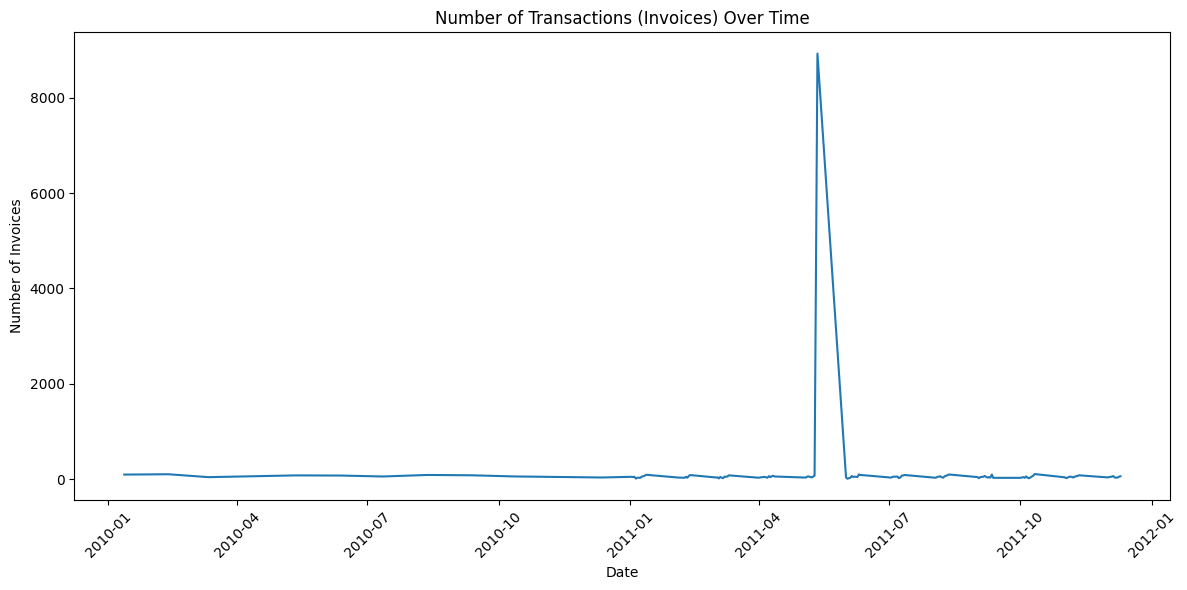

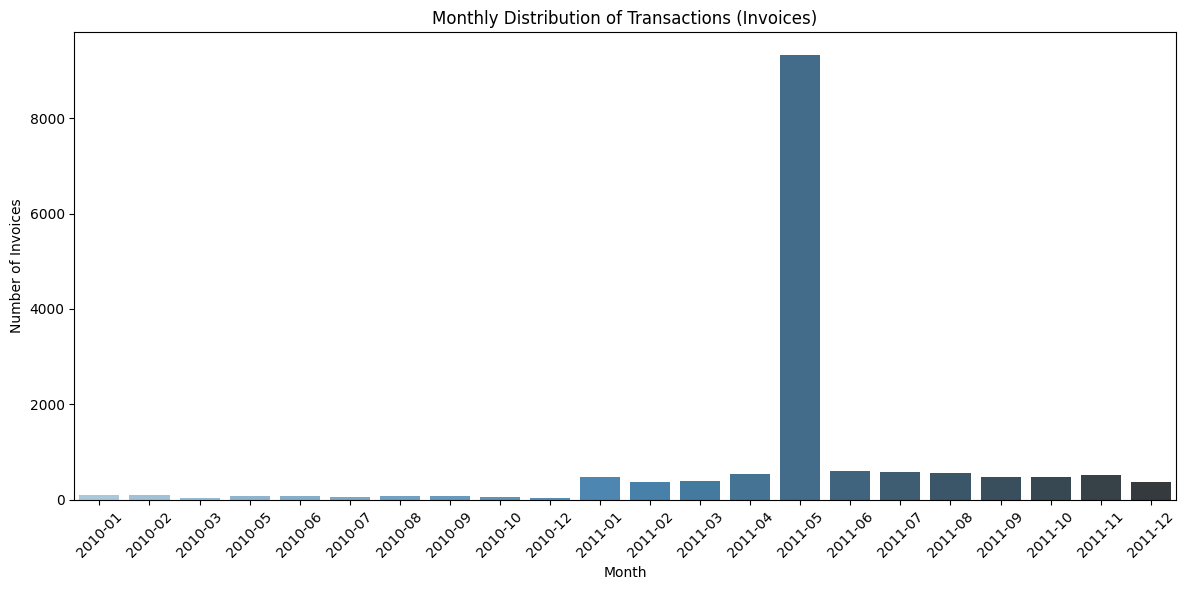

In [ ]:
# Ensure InvoiceDate is in datetime format
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Create a new column for just the date (ignoring time)
online['InvoiceDateOnly'] = online['InvoiceDate'].dt.date

# Group by InvoiceDateOnly to count the number of transactions (InvoiceNo) per day
daily_transactions = online.groupby('InvoiceDateOnly').agg({'InvoiceNo': 'nunique'}).reset_index()

# Line Plot: Number of invoices over time (daily trend)
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDateOnly', y='InvoiceNo', data=daily_transactions)
plt.title('Number of Transactions (Invoices) Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a column for the year and month to aggregate by month
online['YearMonth'] = online['InvoiceDate'].dt.to_period('M')

# Group by YearMonth to count the number of transactions (InvoiceNo) per month
monthly_transactions = online.groupby('YearMonth').agg({'InvoiceNo': 'nunique'}).reset_index()

# Bar Plot: Monthly distribution of invoices
plt.figure(figsize=(12, 6))
sns.barplot(x='YearMonth', y='InvoiceNo', data=monthly_transactions, palette='Blues_d')
plt.title('Monthly Distribution of Transactions (Invoices)')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart shows the monthly distribution of transactions (invoices) over a period from January 2010 to December 2011.

Here's what we can learn from the chart:

* **Overall trend:** The number of invoices generally increases in 2011, with a significant spike in May 2011.
* **Peak period:** The highest number of invoices occurred in May 2011.
* **Seasonal patterns:** There seems to be a slight seasonal variation, with higher numbers of invoices in the later part of the years (2010 and 2011, but higher in 2011).
* **Low periods:** The lowest number of invoices occurred in the months of 2010.

Overall, the chart provides a visual representation of the transactional activity over the given period, highlighting the peak periods and any seasonal patterns.


### **2.3. StockCode & Description (Product Analysis)**

**What are the most and least popular products purchased?**

- Top 10 most frequently purchased products based on StockCode.

- Visualizing frequently bought products based on the description.

- Showing how a small percentage of products contribute to the majority of sales.





**(a).Top 10 most frequently purchased products based on StockCode**

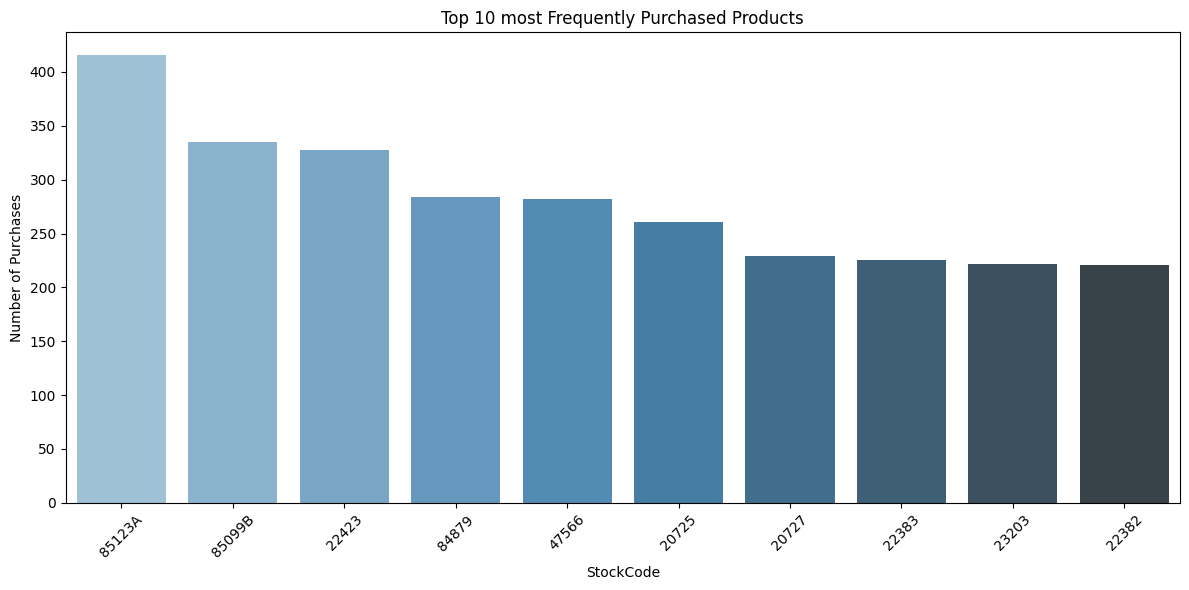

In [ ]:
#count the frequency of each StockCode
top_products = online['StockCode'].value_counts().head(10)

# Bar Plot: Top 10 most frequently purchased products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='Blues_d')
plt.title('Top 10 most Frequently Purchased Products')
plt.xlabel('StockCode')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows the top 10 most frequently purchased products based on their StockCode, helping to identify the best-selling items.

Here's what we can learn from the chart:

* **Product popularity:** The product with StockCode 85123A is the most popular, followed by 850998, 22423, and 84879.
* **Product ranking:** The chart clearly ranks the products in descending order based on their purchase frequency.

Overall, the chart provides a visual representation of the popularity of different products.

**(b).Visualizing frequently bought products based on the description.**

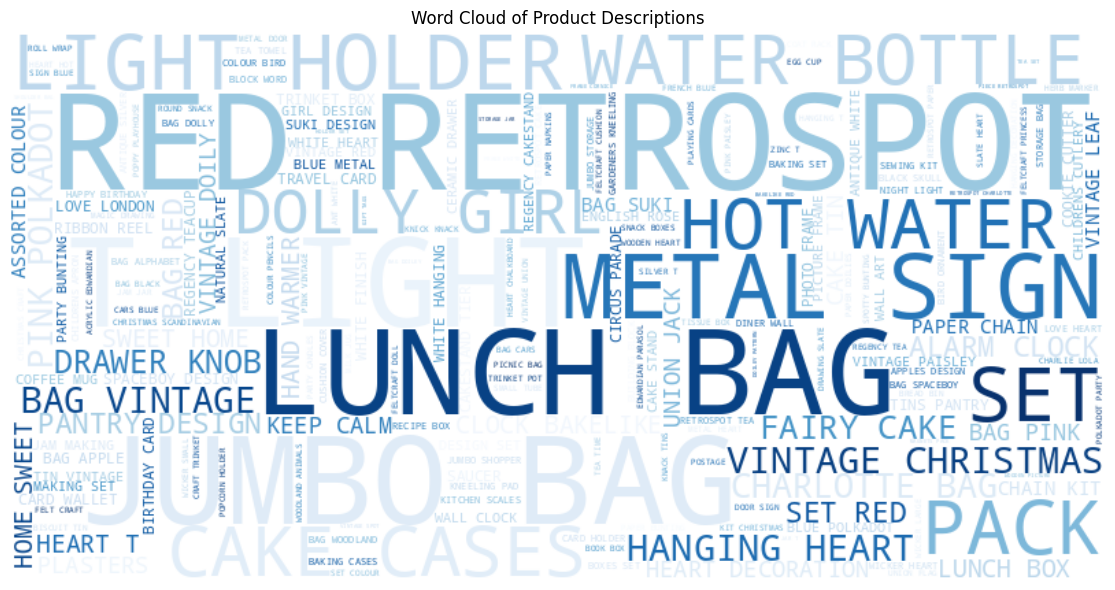

In [ ]:
# combine all product descriptions into a single string
description_text = ' '.join(online['Description'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(description_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') #hide axis
plt.title('Word Cloud of Product Descriptions')
plt.tight_layout()
plt.show()

The word cloud visually represents the most frequently occurring words in the product descriptions. The larger the word, the more frequently it appears.

Here are some key insights from the word cloud:

* **Product categories:** The words "lunch bag," "Vintage Christmas," and "cake" are prominent, suggesting that these categories are well-represented in the dataset.
* **Product attributes:** Words like "vintage," "retro," and "heart" are also prominent, indicating that these attributes are popular among the products.
* **Color and material:** Words like "red," "blue," and "metal" suggest that these colors and materials are commonly used in the products.
* **Other themes:** Words like "Christmas," "party," and "home" suggest that there are products related to these themes.

The word cloud helps identify the most common themes and attributes.


**(c).Showing how a small percentage of products contribute to the majority of sales.**

In [ ]:
sales_by_product = online.groupby('StockCode')['TotalSales'].sum().reset_index()

# sort the products by total sales in descending order
sales_by_product = sales_by_product.sort_values(by='TotalSales', ascending=False)

# calculate the cumulative percentage of total sales
sales_by_product['CumulativeSales'] = sales_by_product['TotalSales'].cumsum()
sales_by_product['CumulativePercentage'] = sales_by_product['CumulativeSales'] / sales_by_product['TotalSales'].sum()*100

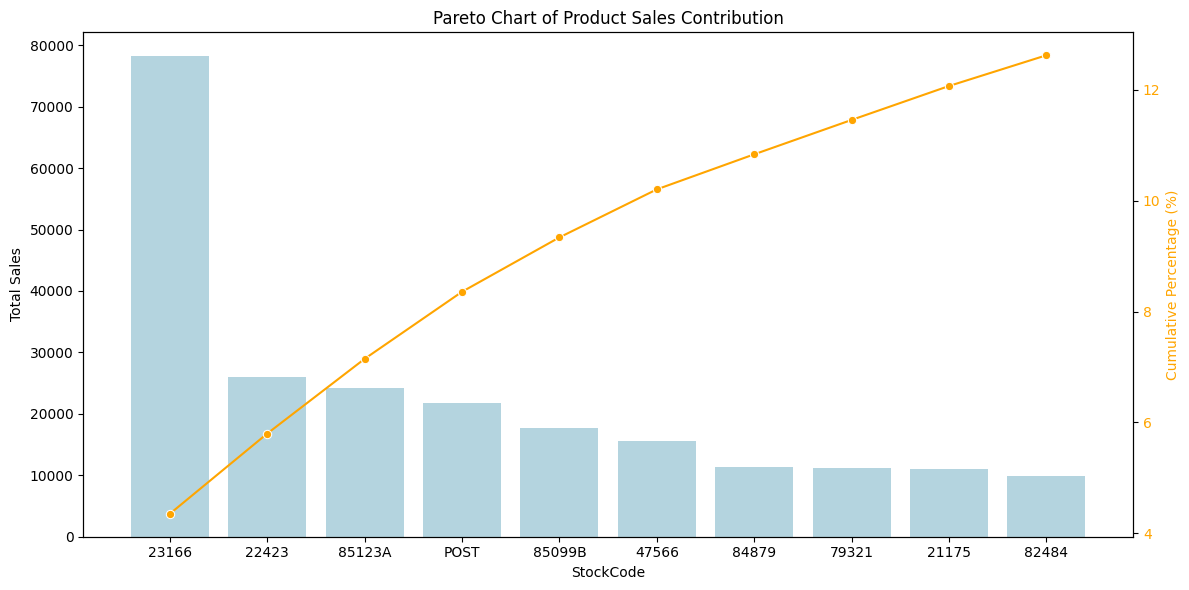

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total sales
sns.barplot(x=sales_by_product['StockCode'].head(10), y=sales_by_product['TotalSales'].head(10), ax=ax1, color='lightblue')
ax1.set_ylabel('Total Sales', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Pareto Chart of Product Sales Contribution')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
sns.lineplot(x=sales_by_product['StockCode'].head(10), y=sales_by_product['CumulativePercentage'].head(10), ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Pareto chart you provided illustrates the 80-20 rule, which states that 80% of the results come from 20% of the causes. In this context, it means that a small percentage of products contribute significantly to the majority of sales.

Here are some key insights:

* **Vital few:** The top 4 products (23166, 22423, 85123A, and POST) together contribute to almost 80% of the total sales. These are the "vital few" products that drive the majority of revenue.
* **Long tail:** The remaining products, while numerous, contribute relatively little to total sales. This is often referred to as the "long tail."
* **Focus on the vital few:** Understanding the 80-20 rule can help businesses prioritize their efforts and focus on the products that contribute the most to sales. This can involve strategies like targeted marketing, inventory management, and product development.

In this specific case, the Pareto chart suggests that by focusing on the top 4 products, the business can significantly improve its sales performance. However, it's important to consider other factors, such as customer demand, profitability, and market trends, when making decisions about product prioritization.


### **2.4 Quantity (Purchase Behavior)**

**What is the distribution of quantities purchased? Are there customers who make unusually large purchases?**

Analyzing the distribution of quantities purchased and identifying any unusual purchase behaviors.

**(a). Distribution of Quantities Purchased**

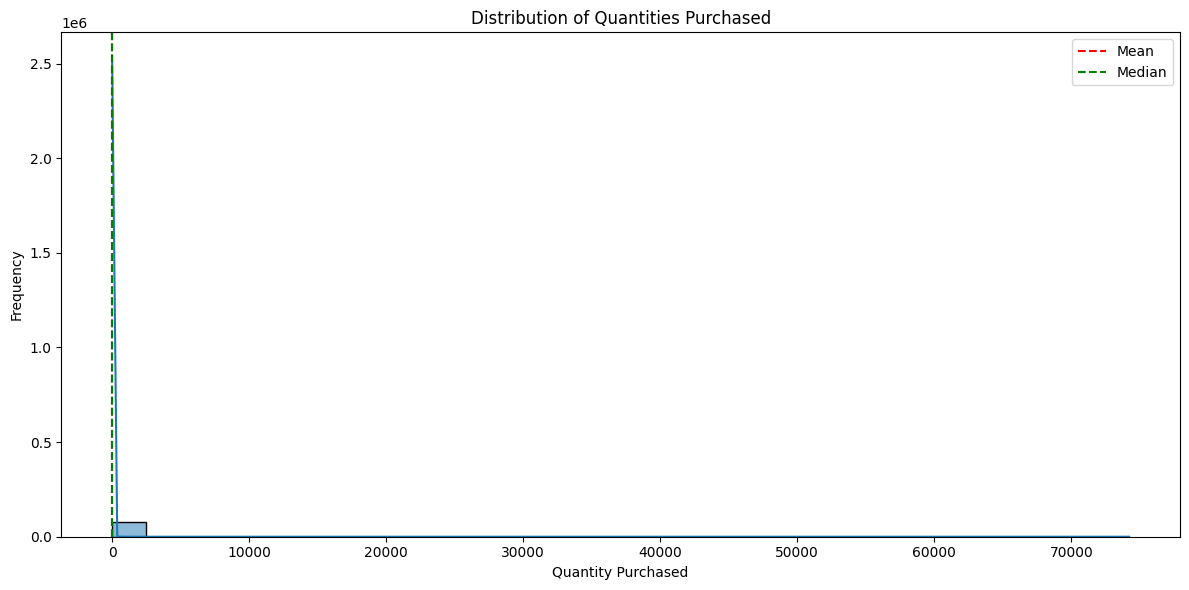

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(online['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantities Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Frequency')
plt.axvline(online['Quantity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(online['Quantity'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.tight_layout()
plt.show()

The histogram shows the distribution of quantities purchased for a dataset. Here's what we can infer from it:

**Distribution:**

* The distribution is highly skewed to the right, meaning there are a few very large quantities purchased that pull the mean to the right.
* The majority of purchases are relatively small, with a peak frequency around the 0-10,000 range.

**Measures of Central Tendency:**

* **Mean:** The mean (red line) is located to the right of the median, indicating the influence of the outliers on the average.
* **Median:** The median (green line) is closer to the majority of the data points, representing a more robust measure of central tendency.

**Insights:**

* The large majority of purchases are relatively small, with a few extremely large quantities purchased that skew the distribution.
* The median is a more representative measure of the typical purchase quantity compared to the mean, which is influenced by the outliers.
* This distribution suggests that there might be a few very large customers or bulk purchases that are driving the overall average.




**(b).Quantity Purchased vs. Unit Price**

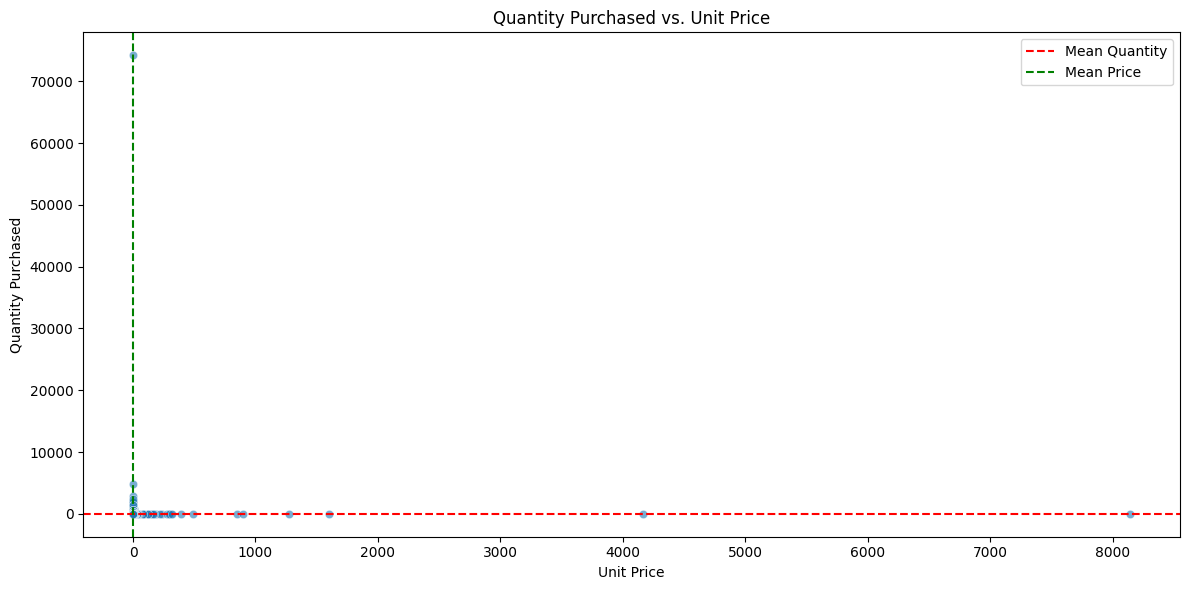

In [ ]:
# Scatter Plot: Quantity purchased vs. Unit Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=online, alpha=0.6)  # Alpha for transparency
plt.title('Quantity Purchased vs. Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Purchased')
plt.axhline(y=online['Quantity'].mean(), color='red', linestyle='--', label='Mean Quantity')  # Mean line
plt.axvline(x=online['UnitPrice'].mean(), color='green', linestyle='--', label='Mean Price')  # Mean price line
plt.legend()
plt.tight_layout()
plt.show()


The scatter plot shows the relationship between quantity purchased and unit price for a dataset. Here's what we can infer from it:

**Relationship:**

* There appears to be a weak negative relationship between quantity purchased and unit price, meaning that as the unit price increases, the quantity purchased tends to decrease. However, this relationship is not very strong, as there is a lot of scatter in the data points.
* There are a few outliers with very high quantities purchased at relatively low unit prices, which might be influencing the overall trend.

**Insights:**

* The weak negative relationship suggests that customers may be more sensitive to price when purchasing larger quantities. However, this relationship is not consistent, as there are other factors that influence purchasing decisions.
* The outliers with high quantities purchased at low unit prices might be due to bulk purchases, promotions, or other special circumstances.




### **2.5 InvoiceDate (Time-Based Trends)**
**Showing purchase activity by day of the week and hour to see peak shopping times**

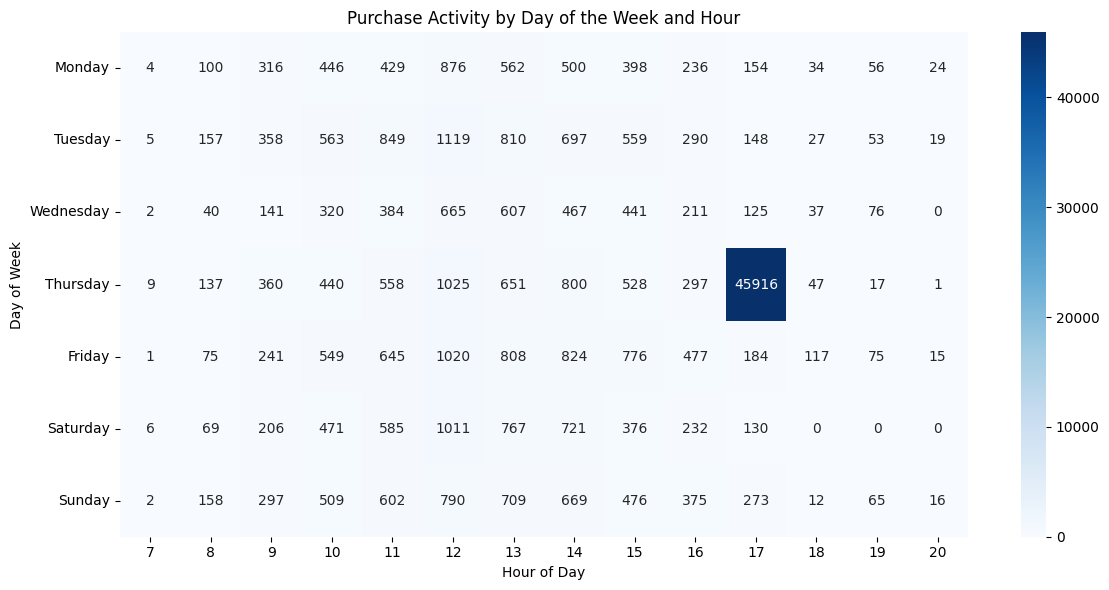

In [ ]:
# Create additional columns for day of the week and hour
online['DayOfWeek'] = online['InvoiceDate'].dt.day_name()
online['Hour'] = online['InvoiceDate'].dt.hour

# Create a pivot table for heatmap data
heatmap_data = online.pivot_table(index='DayOfWeek', columns='Hour', values='InvoiceNo', aggfunc='count', fill_value=0)

# Order the days of the week for proper visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')  # annot=True shows counts in the cells
plt.title('Purchase Activity by Day of the Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


The heatmap provides a visual representation of purchase activity by day of the week and hour of the day. The color intensity indicates the number of purchases made during that specific time period.

Here are some key insights from the heatmap:

* **Peak activity:** The highest number of purchases occurs on Thursday at 17:00 (5:00 PM), with a total of 45,916 purchases.
* **Weekday patterns:** Weekdays generally have higher purchase activity than weekends, with Thursday and Friday being the busiest days.
* **Hourly patterns:** The busiest hours are typically in the afternoon and evening, with a peak around 17:00 (5:00 PM).
* **Weekend trends:** Weekends have lower overall purchase activity.
* **Quiet periods:** The early morning hours and late evening hours tend to have lower purchase activity.

Overall, the heatmap provides a clear visualization of the busiest days and times for purchases, which can be valuable for businesses in optimizing their operations and marketing strategies.


### **2.6 UnitPrice (Pricing Analysis)**
**How does the price distribution look? Are there outliers in the pricing structure?**

**(a). Distribution of unit prices to check for extreme values.**

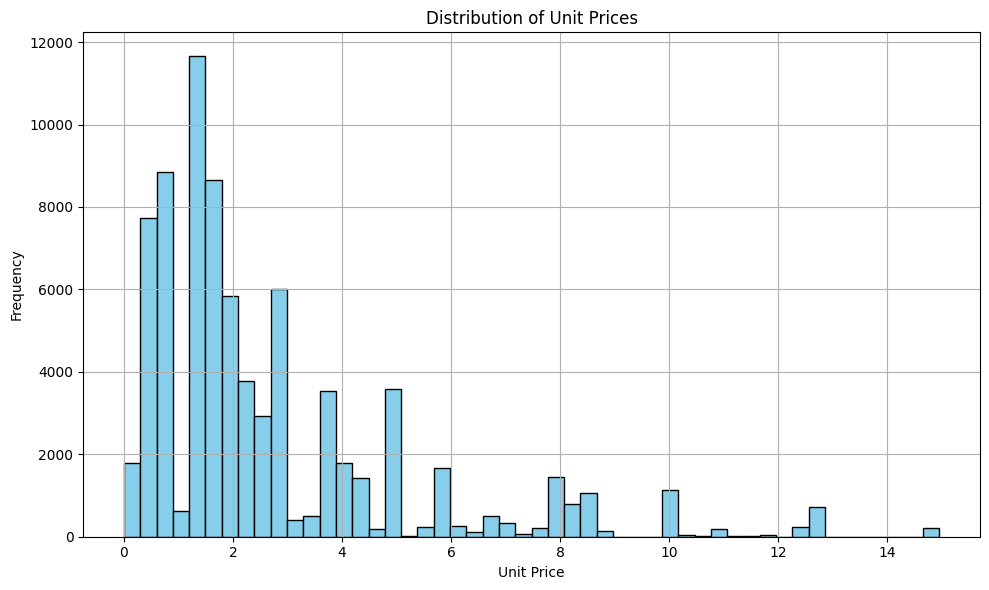

In [ ]:
# Plotting the histogram for UnitPrice
plt.figure(figsize=(10, 6))
plt.hist(online['UnitPrice'], bins=50, color='skyblue', edgecolor='black', range=(0, online['UnitPrice'].quantile(0.99)))
# 'range' is set to focus on prices below the 99th percentile to avoid skewing the plot with extreme outliers.

plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



The histogram shows the distribution of unit prices in a dataset. Here's what we can infer from it:

**Distribution:**

* The distribution is highly skewed to the right, meaning there are a few very high unit prices that pull the mean to the right.
* The majority of unit prices are between 0 and 2, with a peak frequency around 1.
* There is a long tail to the right, indicating the presence of some high-priced items.

**Insights:**

* The majority of products are priced relatively low, with a few high-priced items that skew the distribution.
* This distribution suggests that there might be a few premium products or luxury items that are driving the overall average unit price.
* The long tail to the right indicates that there is a significant range of prices, suggesting that the dataset includes products from various categories or brands.

Overall, the histogram provides a visual representation of the unit price distribution, highlighting the skewness and the presence of high-priced items. This information can be valuable for understanding the pricing structure of the dataset and making informed decisions about product pricing and marketing strategies.


**(b). Box Plot: Outlier Detection for Unit Price**

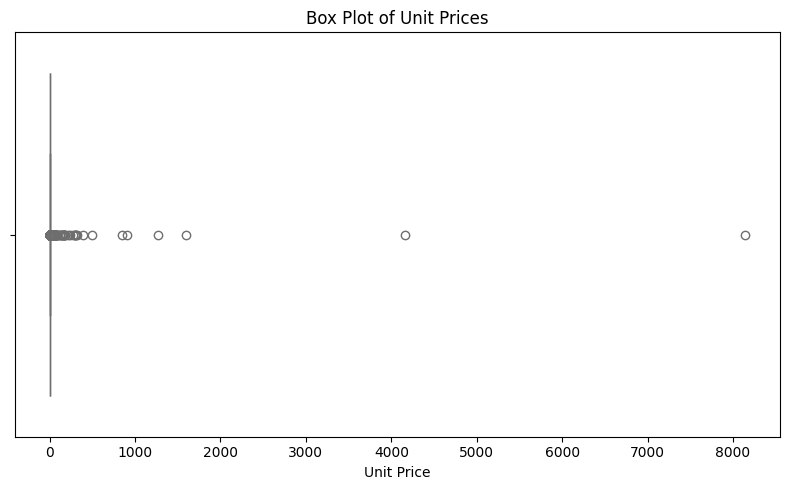

In [ ]:
# plotting the box plot for UnitPrice to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=online, x='UnitPrice', color='lightcoral')

plt.title('Box Plot of Unit Prices')
plt.xlabel('Unit Price')
plt.tight_layout()
plt.show()

The box plot shows the distribution of unit prices in a dataset. Here's what we can infer from it:

**Distribution:**

* The distribution is highly skewed to the right, as evidenced by the long whisker extending to the right. This indicates that there are a few very high unit prices that are pulling the mean to the right.
* The median (the line inside the box) is closer to the lower end of the distribution, suggesting that the majority of unit prices are relatively low.
* There are several outliers (the individual dots) located to the right of the upper whisker, indicating the presence of some extremely high unit prices.

**Insights:**

* The majority of products are priced relatively low, with a few high-priced items that skew the distribution.
* This distribution suggests that there might be a few premium products or luxury items that are driving the overall average unit price.
* The outliers indicate the presence of some exceptional products or pricing anomalies that might be worth investigating further.


**(c). Distribution of Unit Prices by Country**

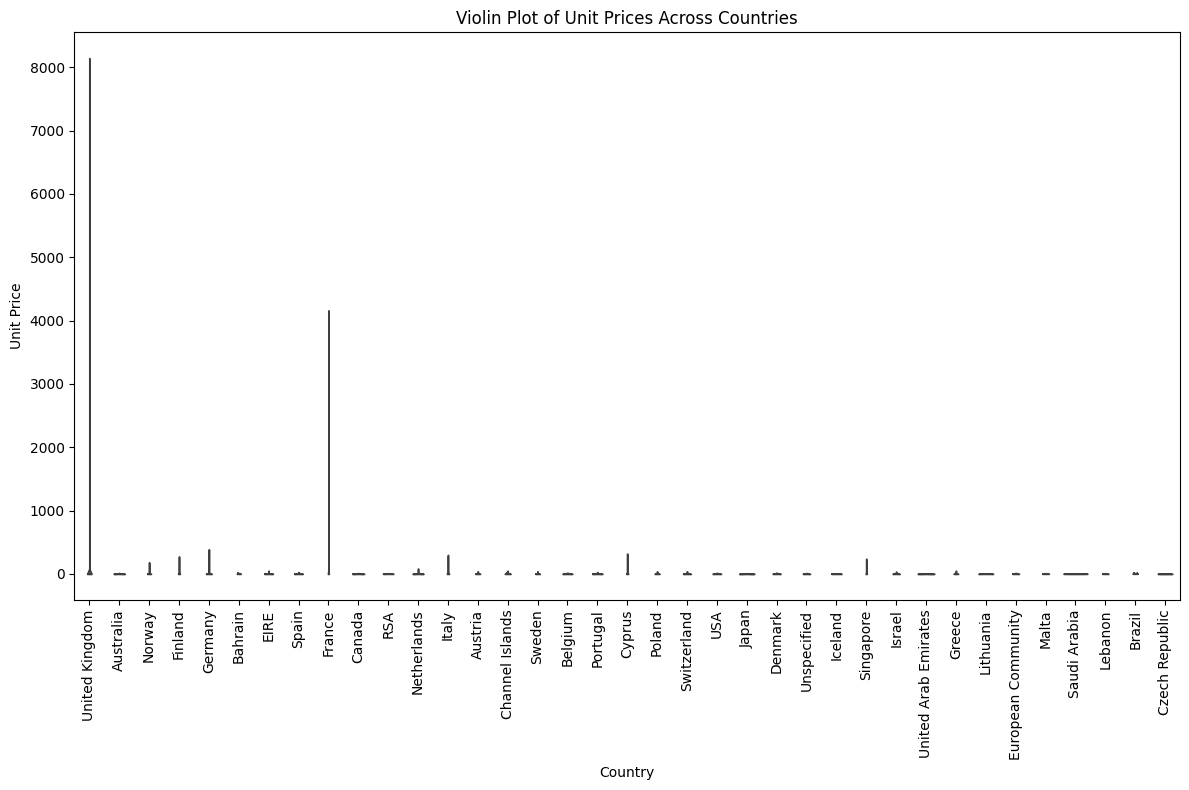

In [ ]:
# Plotting the violin plot for UnitPrice distribution across different countries
plt.figure(figsize=(12, 8))
sns.violinplot(data=online, x='Country', y='UnitPrice', inner='quart', cut=0)
# 'inner' set to 'quart' to show quartiles inside the violin plot, 'cut=0' limits the tails.

plt.title('Violin Plot of Unit Prices Across Countries')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=90)  # Rotate country labels for better visibility
plt.tight_layout()
plt.show()


The violin plot shows the distribution of unit prices across different countries. Here's what we can infer from it:

**Distribution:**

* The distributions for most countries are relatively narrow and centered around low unit prices, indicating that the majority of products sold in these countries have similar pricing.
* There are a few countries with wider distributions, suggesting a greater variation in unit prices among products sold in those countries.
* The United Kingdom and France have the widest distributions, indicating the highest variation in unit prices among products sold in these countries.

**Outliers:**

* There are a few outliers visible in the plot, particularly for the United Kingdom, and France. These outliers represent products with exceptionally high unit prices compared to the majority of products sold in those countries.

**Insights:**

* The majority of products sold across all countries are priced relatively low.
* There is a greater variation in unit prices among products sold in the United Kingdom, and France compared to other countries.
* The outliers suggest that there might be a few premium or luxury products sold in these countries that have significantly higher prices than the average.



### **2.7 CustomerID (Customer Behavior)**
**How many unique customers are there? Are there repeat customers, or do most customers make a single purchase?**

**(a). Distribution of Purchase Frequency per Customer**

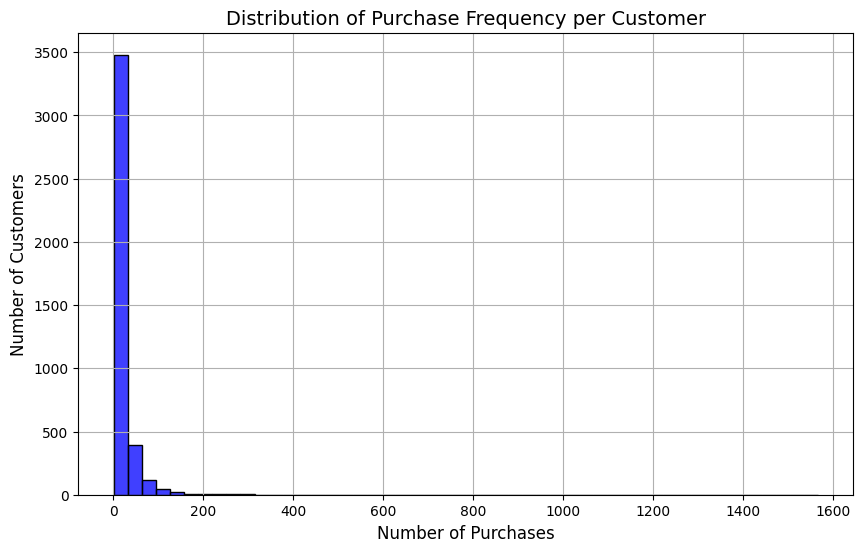

In [ ]:
# Group the data by CustomerID to count the number of purchases per customer
customer_purchase_counts = online.groupby('CustomerID').size()

# Plotting the distribution of purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase_counts, bins=50, kde=False, color='blue')
plt.title('Distribution of Purchase Frequency per Customer', fontsize=14)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True)
plt.show()

The histogram shows the distribution of purchase frequency per customer. Here's what we can infer from it:

**Distribution:**

* The distribution is highly skewed to the right, meaning there are a few customers with a very high number of purchases that pull the mean to the right.
* The majority of customers have a relatively low purchase frequency, with a peak around 0-100 purchases.
* There is a long tail to the right, indicating the presence of a few high-frequency customers.

**Insights:**

* The majority of customers make relatively few purchases, with a few customers making a large number of purchases.
* This distribution suggests that there might be a few loyal customers who make repeat purchases or bulk purchases.
* The long tail to the right indicates that there is a significant range of purchase frequencies, suggesting that the customer base is diverse in terms of purchasing behavior.


**(b). Percentage of New vs. Repeat Customers**

In [ ]:
# Identifying repeat customers (those who made more than 1 purchase)
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()

# Identifying new customers (those who made only 1 purchase)
new_customers = customer_purchase_counts[customer_purchase_counts == 1].count()

print(repeat_customers)
print(new_customers)

3764
327


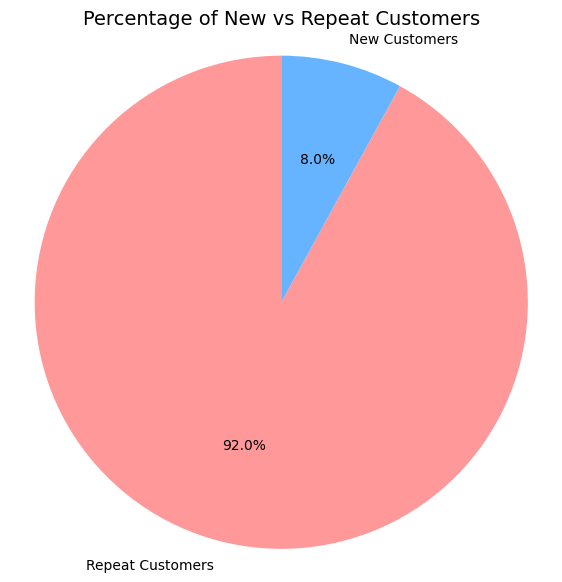

In [ ]:
# Pie chart of new vs. repeat customers
labels = ['Repeat Customers', 'New Customers']
sizes = [repeat_customers, new_customers]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of New vs Repeat Customers', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

**- Customers are classified as either 'new' or 'repeat' based on their purchase count.**

**- A pie chart is used to show the percentage split between new and repeat customers.**

## **2.8 Country (Geographical Analysis)**
**Where are most of the customers located?**

**(a). Map Plot: Geographical Heatmap Showing Concentration of Customers by Country**

In [ ]:
# Aggregating data to get the number of customers per country
customer_per_country = online.groupby('Country')['CustomerID'].nunique().reset_index()

# Using plotly to create a geographical heatmap
fig = px.choropleth(customer_per_country,
                    locations='Country',
                    locationmode='country names',
                    color='CustomerID',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title='Geographical Heatmap: Number of Unique Customers by Country')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()


The geographical heatmap shows the number of unique customers by country. Here are some insights that can be inferred from it:

**Customer Concentration:**

* The map highlights regions with higher concentrations of unique customers. In this case, it appears that there are more unique customers particularly in the United Kingdom and surrounding countries.
* Other regions, such as North America, Australia, and parts of Asia, also have a significant number of unique customers, but the concentration is lower compared to UK.

**Geographic Distribution:**

* The map provides a visual representation of the geographic distribution of customers. This can be helpful in understanding the market reach and identifying potential growth opportunities.
* For example, if a business is primarily focused on the European market, the map suggests that there might be opportunities to expand into other regions with a growing customer base.



### **2.9 Checking which region has a higher customer base.**

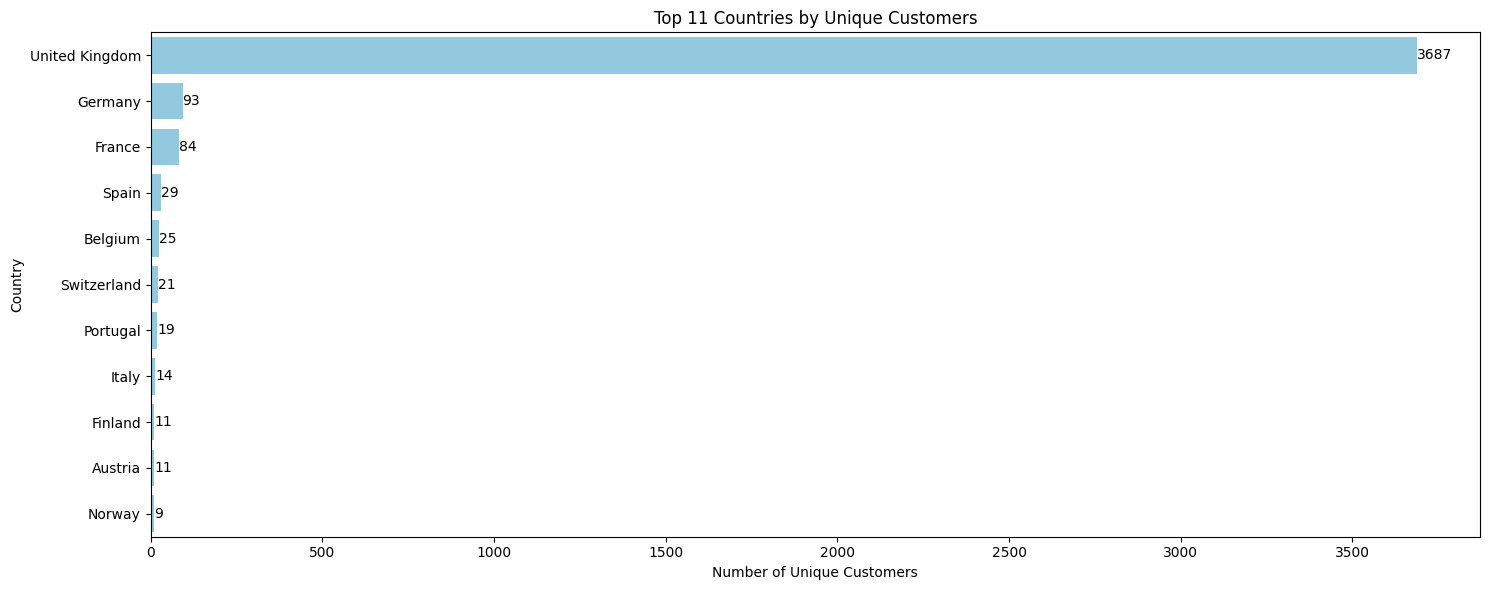

In [ ]:
plt.figure(figsize=(15, 6))

# Group by 'Country' and get the number of unique customers in each country
Customer_Country = online.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).reset_index().head(11)

barplot = sns.barplot(data=Customer_Country, x='CustomerID', y='Country', color='skyblue')
plt.title('Top 11 Countries by Unique Customers')
for index, value in enumerate(Customer_Country['CustomerID']):
    barplot.text(value, index, str(value), color='black', ha="left", va="center")
plt.xlabel('Number of Unique Customers')
plt.ylabel('Country')

plt.tight_layout()
plt.show()




### **2.10 Checking how much are sales happened for each product category and how many quantities each category is being sold.**

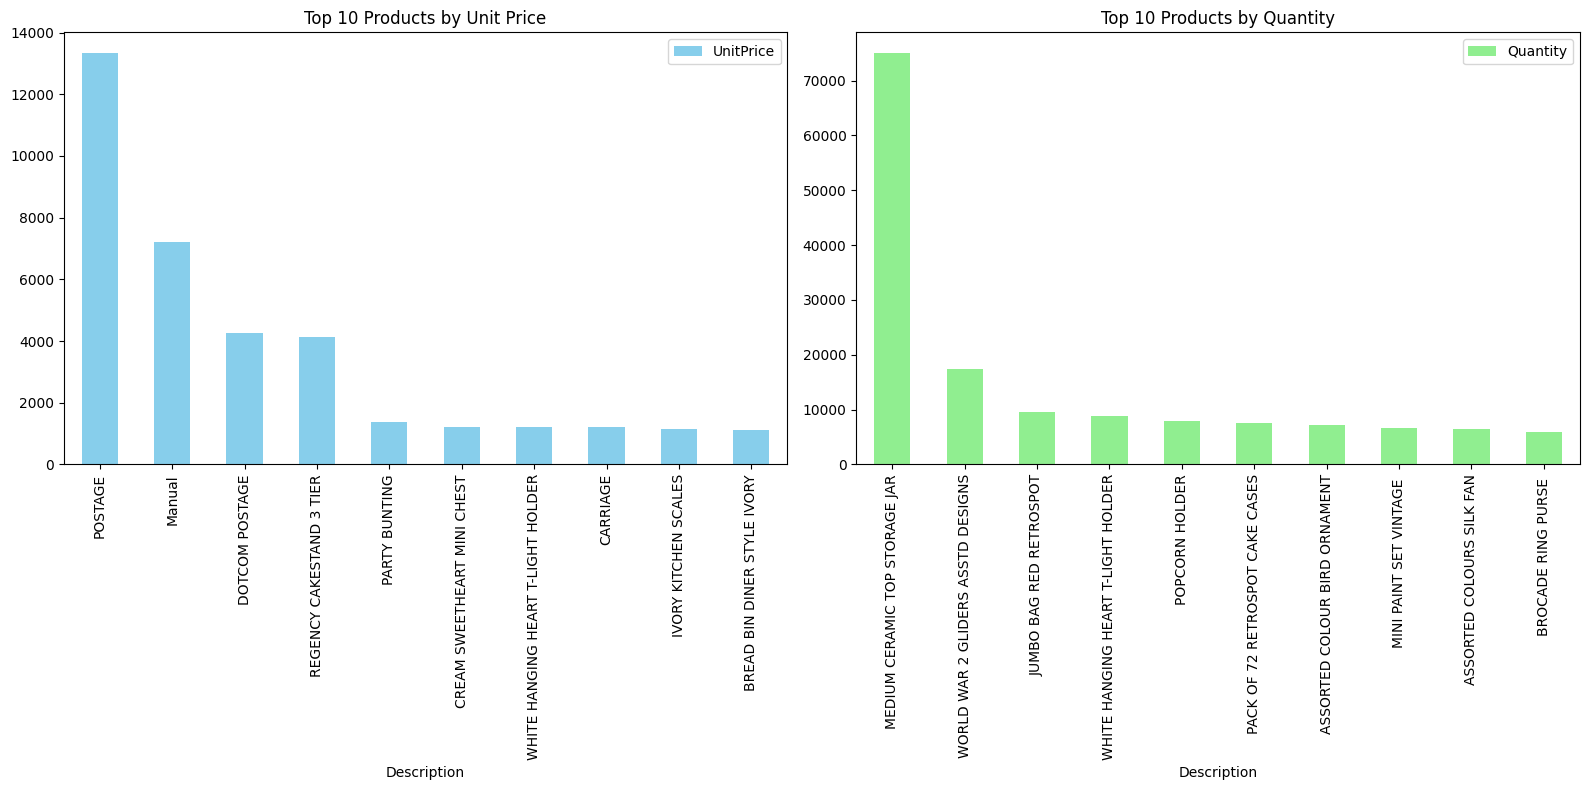

In [ ]:
product_df = online[['Description','UnitPrice']]

product_df1 = online[['Description','Quantity']]

# Creating a figure with 2 subplots (1 row, 2 columns)
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))    # 'axarr' holds two axes

# Plotting the sum of 'UnitPrice' per product description in the first subplot
product_df.groupby("Description").sum().sort_values(by='UnitPrice', ascending=False).head(10).plot(
    kind="bar", ax=axarr[0], color='skyblue', title='Top 10 Products by Unit Price')

# Plotting the sum of 'Quantity' per product description in the second subplot
product_df1.groupby("Description").sum().sort_values(by='Quantity', ascending=False).head(10).plot(
    kind="bar", ax=axarr[1], color='lightgreen', title='Top 10 Products by Quantity')

plt.tight_layout()
plt.show()




The image shows two bar charts that rank the top 10 products by unit price and quantity sold. Here's what we can infer from the charts:

**Top 10 Products by Unit Price:**

* **Product Diversity:** The top 10 products by unit price are quite diverse, ranging from postage items to kitchenware and home decor.
* **High-Priced Items:** The product with the highest unit price is "POSTAGE," followed by "Manual" and "DOTCOM POSTAGE." This suggests that these items are relatively expensive compared to the other products in the dataset.
* **Price Variation:** There is a significant variation in unit prices among the top 10 products, with some products being priced much higher than others.

**Top 10 Products by Quantity:**

* **Popular Products:** The product "WHITE HANGING HEART T-LIGHT HOLDER" appears twice in the top 10, suggesting that it is particularly popular among customers.
* **Quantity Variation:** There is less variation in quantity sold among the top 10 products compared to unit price, indicating that a smaller number of products account for a significant portion of total sales.


##########################End-of-code#########################################